# Denetimli Öğrenme Nedir?  

Denetimli öğrenme, makine öğrenmesi yöntemlerinin alt dallarından biridir. Bu yöntem, **etiketli veri kümeleri** kullanarak model eğitme sürecini içerir. Etiketli veriler, her girdinin doğru çıktısının bilindiği veri setleridir.  

Denetimli öğrenme sürecinde model, girdiler ile bu girdilere karşılık gelen doğru çıktılar arasındaki ilişkileri öğrenir. Örnek vermek gerekirse:  

- Elimizde, bir bölgeye ait evlerin boyutlarına göre fiyatlarının bulunduğu bir veri seti olsun. Bu durumda, model, evlerin boyutları (girdiler) ile fiyatları (çıkıtlar) arasındaki ilişkiyi öğrenir. Daha sonra, yeni bir evin boyutunu verildiğinde, model bu yeni girdi ile daha önceki veri setindeki ilişkilere dayanarak evin fiyatını tahmin edebilir.  

- Bir diğer örnek, hastaların tomografi görüntülerinin analizidir. Model, veri setindeki girdilerin (görüntüler) çıktıları (kitle olup olmadığı) dahilinde, bir hastanın görüntüsünde kitle olup olmadığına dair tahminlerde bulunabilir.  

Denetimli öğrenme, hem regresyon hem de sınıflandırma problemlerinde yaygın olarak kullanılır ve birçok pratik uygulamada önemli bir rol oynamaktadır.

 ## Regresyon  

Regresyon, sürekli bir değeri tahmin etmek için kullanılan bir yöntemdir. Amaç, belirli girdiler ile bir sonuç arasındaki ilişkiyi modellemektir. Örneğin, bir evin fiyatını tahmin etmek veya bir ürünün gelecekteki satışlarını öngörmek regresyon görevleridir.   

Ev satış fiyatı tahmin örneği üzerinden devam edecek olursak:  

- **Girdiler:** Evlerin boyutu  
- **Çıktılar:** Evlerin fiyatı  

Bu durumda, fiyat tahmini için **lineer regresyon** yönteminden faydalanabiliriz. Lineer regresyon, $x$ ve $y$ eksenlerinden oluşan bir grafik üzerinde, daha önce bahsetmiş olduğumuz girdi ve çıktılar arasındaki ilişkiyi modellemek amacıyla bir doğrusal fonksiyon ilişkisi kurmayı sağlar.   

#### Doğrusal Fonksiyon  
Doğrusal fonksiyonumuz şu şekilde ifade edilir:  

$$
f(x) = mx + n   
$$

Lineer regresyonu anlatırken doğrusal fonksiyonumuzun parametrelerini $w$ ve $b$ şeklinde kullanacağız. Bu durumda fonksiyonu şöyle yazabiliriz:  

$$
f(x) = wx + b   
$$
Bu ifade, bir girdi $x$ verildiğinde, çıktıyı $f(x) = ŷ$ tahmin etmek için kullanılacak olan bir doğrusal modelin genel formudur.
  
 

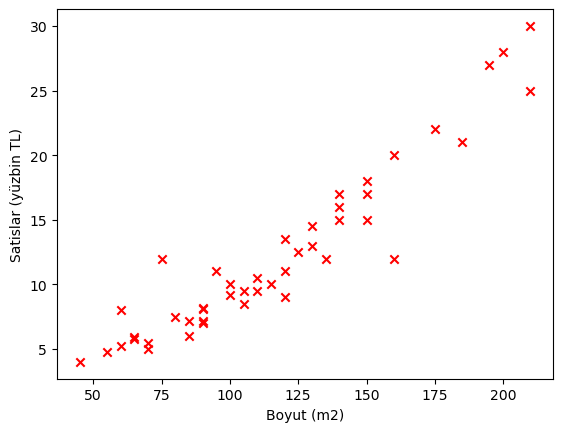

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

veriler = pd.read_csv('satislar.csv')
boyut = veriler['Boyut']
satislar = veriler['Satislar']/100000
plt.scatter(x=boyut, y=satislar,color="red",marker='x')
plt.xlabel('Boyut (m2)')
plt.ylabel('Satislar (yüzbin TL)')
plt.show()


### Veri Setinin Görselleştirilmesi  

Görmüş olduğunuz nokta grafiği, elimizdeki veri setinin görselleştirilmiş halidir. Burada, evlerin boyutları girdileri ve satış fiyatları ise çıktıları oluşturmaktadır. Bu grafiğe bir **lineer regresyon** algoritması ekleyecek olursak, modelimiz bu noktalar arasındaki en iyi doğrusal ilişkiyi bulmaya çalışacaktır.  

### Lineer Regresyon Eğrisi  

Lineer regresyon, veri noktalarını en iyi temsil eden bir doğrusal fonksiyon oluşturur. Bu doğrusal fonksiyon, verilerin genel eğilimini açıklamak için kullanılır. Grafikteki noktalara en yakın olan bir doğru çizilir. Bu doğru, belirli bir modelin eğrisi olarak adlandırılır ve genellikle şu şekilde matematiksel olarak ifade edilir:  

$$f(x) = wx + b$$  

- *$w$*: Doğrunun eğimini temsil eder, bu da boyuttaki değişim ile fiyat arasındaki ilişkiyi gösterir.  
- *$b$*: Doğrunun y-eksenini kestiği noktadır; bu değer, boyutsuz bir evin varsayımsal satış fiyatını ifade eder.  

### Lineer Regresyon Uygulaması  

Elde edilen bu doğrusal model, verilen bir evin boyutu için tahmini bir satış fiyatı sağlamak üzere kullanılabilir. Örneğin, eğer elimizdeki veri setinde bir evin boyutu 150 metrekare ise, bu boyut için lineer regresyon modeline göre hesaplanan fiyat, evin piyasa değerini tahmin etmemizi sağlar.  

Bu yöntem, özellikle büyük veri setlerinde ilişkiyi anlayabilmemiz ve öngörülerde bulunmamız açısından önemli bir rol oynamaktadır.

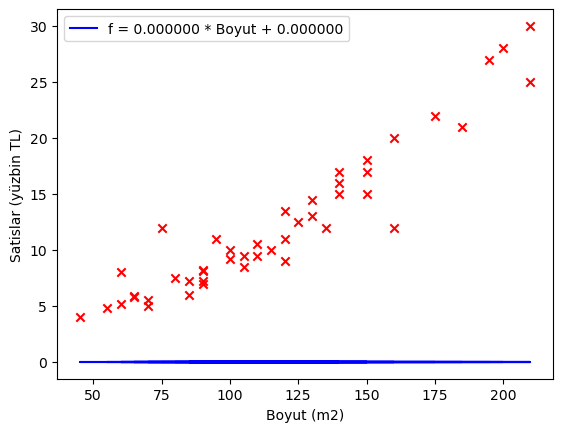

In [6]:
w = 0 
b = 0  

f = w * boyut + b
plt.scatter(x=boyut, y=satislar, color="red", marker='x')
plt.plot(boyut, f, color="blue", linestyle='-', label=f"f = {w:2f} * Boyut + {b:2f}")  
plt.legend()
plt.xlabel('Boyut (m2)')
plt.ylabel('Satislar (yüzbin TL)')
plt.show()


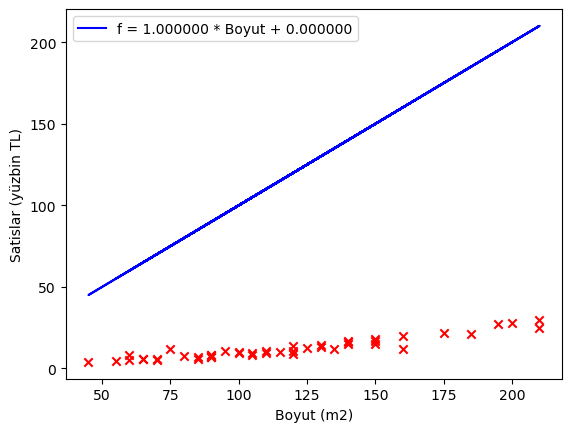

In [7]:
w = 1 
b = 0 

f = w * boyut + b 
plt.scatter(x=boyut, y=satislar, color="red", marker='x') 
plt.plot(boyut, f, color="blue", linestyle='-', label=f"f = {w:2f} * Boyut + {b:2f}") 
plt.legend()
plt.xlabel('Boyut (m2)')
plt.ylabel('Satislar (yüzbin TL)')
plt.show()

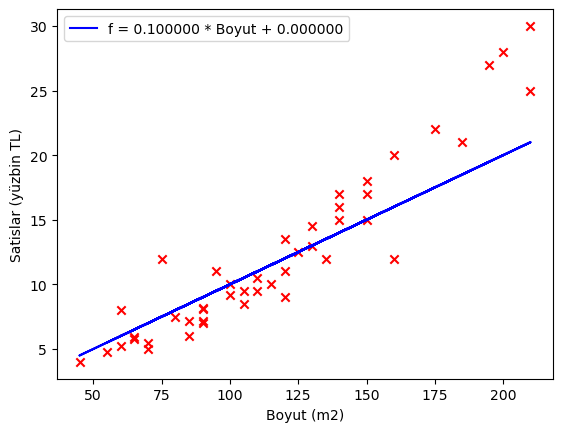

In [8]:
w = 0.1 
b = 0 

f = w * boyut + b  
plt.scatter(x=boyut, y=satislar, color="red", marker='x')  
plt.plot(boyut, f, color="blue", linestyle='-', label=f"f = {w:2f} * Boyut + {b:2f}")
plt.legend()
plt.xlabel('Boyut (m2)')
plt.ylabel('Satislar (yüzbin TL)')
plt.show()

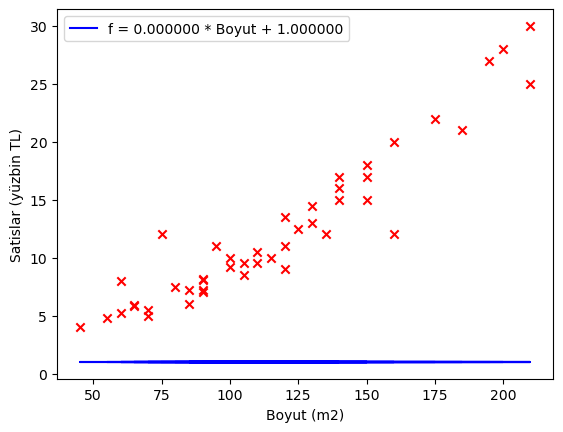

In [9]:
w = 0  
b = 1  

f = w * boyut + b  
plt.scatter(x=boyut, y=satislar, color="red", marker='x')  
plt.plot(boyut, f, color="blue", linestyle='-', label=f"f = {w:2f} * Boyut + {b:2f}")  
plt.legend()
plt.xlabel('Boyut (m2)')
plt.ylabel('Satislar (yüzbin TL)')
plt.show()

### Doğrusal Fonksiyonun Parametreleri ve Grafik  

Görmüş olduğunuz gibi, doğrusal fonksiyonun parametrelerinde değişiklik yaptığımızda çizgi grafiğinin görünümü de buna bağlı olarak değişmektedir. Elimizdeki veri setine en uygun çizgi grafiğine sahip olmamız, bu durumun veriler arasındaki ilişkiyi ne kadar iyi modellediğini gösterir.  

Ancak, fonksiyon parametrelerinin bu şekilde grafikteki değişiklikleri gözlemleyerek deneme-yanılma yöntemiyle bulunması, oldukça verimsiz bir yöntem olacaktır. Bu nedenle, fonksiyonumuzun parametrelerini veri setimize en uygun biçimde oluşturmak için iki önemli kavramdan bahsedeceğiz: **cost (maliyet) fonksiyonu** ve **gradyan inişi (gradient descent) algoritması**.  

### Cost (Maliyet) Fonksiyonu  

Maliyet fonksiyonu, modelimizin doğruluğunu ölçmek için kullanılır. Doğrusal regresyon modelinde, genellikle **ortalama kare hata (Mean Squared Error - MSE)** kullanılır. Bu fonksiyon, modelin tahmin ettiği değerler ile gerçek değerler arasındaki farkların karesini alarak ortalamasını hesaplar. Maliyet fonksiyonu şu şekilde ifade edilir:  

$$J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (f(x_i) - y_i)^2$$  

Burada,  
- $J(w, b)$: Maliyet fonksiyonu  
- $n$: Toplam veri noktası sayısı  
- $f(x_i)$: Modelin tahmin ettiği değer  
- $y_i$: Gerçek değer  

### Gradyan İnişi Algoritması  

Gradyan inişi, maliyet fonksiyonunu minimize etmek için kullanılan bir optimizasyon algoritmasıdır. Amaç, maliyet fonksiyonunun çıktısını en düşük seviyeye indirmektir. Gradyan inişi, parametrelerin her iterasyonda güncellenmesi yoluyla çalışır. Güncelleme formülleri şu şekildedir:  

$$
w := w - \alpha \frac{\partial J(w, b)}{\partial w}  
$$  

$$ 
b := b - \alpha \frac{\partial J(w, b)}{\partial b}  
$$  

Burada,  
- $\alpha$: Öğrenme oranını temsil eder; bu, güncellemelerin boyutunu belirler.  
- $\frac{\partial J(w, b)}{\partial w}$ ve $\frac{\partial J(w, b)}{\partial b}$: Maliyet fonksiyonunun $w$ ve $b$ üzerindeki gradyanı, yani değişikliklerin etkisini ölçer.  

Gradyan inişi algoritması, parametreleri iteratif olarak güncelleyerek en iyi doğrusal fit (uyum) elde edene kadar devam eder. Bu yöntem, deneme-yanılma yöntemine göre çok daha etkili ve verimli bir çözüm sunmaktadır.

### Cost Fonksiyonu  

Cost fonksiyonu, modelimizin doğruluğunu ölçmeye yarayan bir araçtır. Bu fonksiyon, modelin yaptığı tahminlerin (f(x) = ŷ) gerçek değerlerden (y) ne kadar uzak olduğunu belirler. Cost fonksiyonu, genel olarak şu şekilde ifade edilir:  

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (f(x_i) - y_i)^2 = \frac{1}{2m} \sum_{i=1}^{m} (ŷ - y_i)^2 = \frac{1}{2m} \sum_{i=1}^{m} ((w \cdot x_i + b) - y_i)^2
$$  

Burada,  
- $J(w, b)$: Maliyet fonksiyonu.  
- $m$: Veri setindeki örnek sayısını ifade eder.  
- $f(x)$: Model tarafından tahmin edilen değerlerdir (ŷ).  
- $y_i$: Gerçek hedef değerlerdir.  

Bu fonksiyon, doğrusal fonksiyonumuzun yapmış olduğu tahminleri hedef değerler ile karşılaştırarak, tahminlerin ne kadar doğru olduğunu gösterir. Örnek olarak, elimizdeki veri setinde ev boyutu gibi bir girdi ile ev fiyatı gibi bir çıktının bulunduğunu düşünelim. Cost fonksiyonu, modelin belirli ev boyutları için tahmin ettiği fiyatların, gerçek ev fiyatlarına (hedef değer) ne kadar yakın olduğunu hesaplar.  

### Uygulama ve Önemi  

Cost fonksiyonu, modelin eğitilmesi aşamasında son derece önemlidir çünkü modelin parametrelerinin (w ve b) nasıl güncelleneceğinin ve iyileşeceğinin belirleyicisidir. Daha düşük bir maliyet değeri, modelin hedef değerler üzerinden daha doğru tahminler yaptığı anlamına gelir. Böylece, cost fonksiyonun minimize edilmesi, daha başarılı bir model elde etmemize yardımcı olur.

In [52]:
m = len(veriler)
print(m)

45


### Veri Setimizdeki m Değeri  

Görmüş olduğunuz gibi, bizim veri setimiz için $m$ değeri 45'tir. Bu, toplam 45 veri noktasının bulunduğunu gösterir. Cost (maliyet) fonksiyonumuzun gradyan iniş algoritmasının bir parçası olarak kullanılması, doğrusal fonksiyonumuzun parametrelerinin en uygun biçimde hesaplanmasına olanak tanır.  

### Gradyan İnişi Algoritması  

Gradyan inişi, parametrelerin ($w$ ve $b$) güncellenmesi için kullanılan bir optimizasyon yöntemidir. Formül olarak şu şekilde ifade edilebilir:  

$$
w = w - \alpha \frac{\partial J(w, b)}{\partial w}  
$$  
$$  
b = b - \alpha \frac{\partial J(w, b)}{\partial b}  
$$  

Burada:  
- $w$: Doğrusal modelin eğim parametresi.  
- $b$: Doğrusal modelin kesişim parametresi (intercept).  
- $\alpha$: Öğrenme oranı, güncellemenin ne kadar büyük olacağını belirler.  
- $\frac{\partial J(w, b)}{\partial w}$ ve $\frac{\partial J(w, b)}{\partial b}$: Cost fonksiyonunun $w$ ve $b$ üzerindeki gradyanlarıdır.  

Bu algoritma, doğrusal fonksiyonumuzun parametrelerini elimizdeki veri setine göre en uygun ilişkiyi kuracak şekilde güncellemeye yarar. Gradyan inişi yöntemini uyguladığımızda, aşağıdaki güncelleme formüllerini elde ederiz:  

$$
w = w - \alpha \cdot \frac{1}{2m} \cdot J(w, b) \cdot x  
$$  

$$  
b = b - \alpha \cdot \frac{1}{2m} \cdot J(w, b)  
$$  

Burada:  
- $x$: Girdi veri noktasıdır.  
- $J(w, b)$: Maliyet fonksiyonu, modelin doğruluğunu ölçmektedir.  

### Gradyan İnişinin Önemi  

Gradyan inişi algoritması, parametrelerin optimize edilmesinde kritik bir rol oynar. Hedefimiz, cost fonksiyonunu minimize ederek en iyi tahmin performansını elde etmektir. Doğru bir şekilde güncellenen w ve b değerleri, modelimizin doğruluğunu artıracak en uygun doğrusal ilişkiyi kurmamıza yardımcı olur.

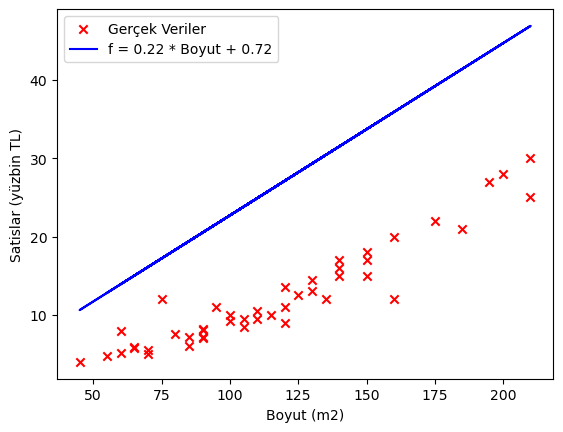

In [53]:

w = np.random.rand()   
b = np.random.rand()  
a = 0.000001

j = (1/(2*m)) * np.sum((f - satislar)**2)  
    
gradient_w = (1/m) * np.sum((f - satislar) * boyut)  
gradient_b = (1/m) * np.sum(f - satislar)  
w = w - a * gradient_w  
b = b - a * gradient_b  

plt.scatter(x=boyut, y=satislar, color="red", marker='x', label='Gerçek Veriler')    
plt.plot(boyut, w * boyut + b, color="blue", linestyle='-', label=f"f = {w:.2f} * Boyut + {b:.2f}")  
plt.legend()  
plt.xlabel('Boyut (m2)')  
plt.ylabel('Satislar (yüzbin TL)')  
plt.show()  

### Öğrenme Oranı (Learning Rate)  

Gradyan inişi algoritmasında bulunan $\alpha$ değeri, öğrenme oranını (learning rate) temsil eder. Öğrenme oranı, modelin parametrelerini ne kadar hızlı veya yavaş güncelleyeceğimizi belirleyen önemli bir parametredir. Öğrenme oranının büyüklüğü, güncellemelerin boyutunu etkiler:  

- **Yüksek Öğrenme Oranı**: Parametrelerin hızlı bir şekilde güncellenmesini sağlar, ancak çok yüksek bir öğrenme oranı, optimal çözümleri atlamamıza ve sonuçta modelin dengesizlik göstermesine neden olabilir. Aşırı büyük adımlar, maliyet fonksiyonunun minimumuna ulaşmadan dalgalanmalara yol açabilir.  
  
- **Düşük Öğrenme Oranı**: Parametre güncellemeleri daha yavaş gerçekleşir, bu da modelin uzun süre boyunca daha küçük adımlarla öğrenmesine olanak tanır. Ancak çok düşük bir öğrenme oranı, eğitimin gereğinden fazla uzamasına ve yerel minimumlarda hapsetmeye sebep olabilir.  

Bu yüzden, doğru bir öğrenme oranı seçimi, modelin başarısını belirleyen kritik bir faktördür. Genellikle deneysel olarak en uygun öğrenme oranı belirlenir veya öğrenme oranını adaptif olarak ayarlayan algoritmalar kullanılır.